# Clustering comparison

This notebook compares two clustering methods:
- fastclust: a star-shape algorithm that selects a set prototypes from starting structures, and creates clusters with all distances of each member to its central element (prototype) below a given threshold.[see https://hal.archives-ouvertes.fr/hal-03540927/]
- radius: a hierarchical ascendant clustering with linkage function as the radius of the smallest enclosing ball. The prototypes are the centers of the balls (and not a subset of the initial structures).[see https://hal.archives-ouvertes.fr/hal-03651323]

The first comparison is done on the number of clusters obtained by each method on RNA trinucleotides clustered at 1 A RMSD.
For this one it is not necessary to run the second clustering on your computer, we give the numbers here.

In [3]:
first_clust = {'AAA': 2589, 'AAC': 2063, 'ACA': 1810, 'ACC': 1781, 'CAA': 2154, 'CAC': 1545, 'CCA': 1934, 'CCC': 2515}
sec_clust = {'AAA': 1022, 'AAC': 740, 'ACA': 672, 'ACC': 674, 'CAA': 798, 'CAC': 585, 'CCA': 727, 'CCC': 891}

In [4]:
print("Ratio from first on second:")
for motif in first_clust.keys():
    print(motif + " = " + str(first_clust[motif]/sec_clust[motif]))

Ratio from first on second:
AAA = 2.5332681017612524
AAC = 2.787837837837838
ACA = 2.693452380952381
ACC = 2.642433234421365
CAA = 2.699248120300752
CAC = 2.641025641025641
CCA = 2.660247592847318
CCC = 2.8226711560044895


We have between 2.5 and 3 more clusters when using fastclust compared to using radius. 

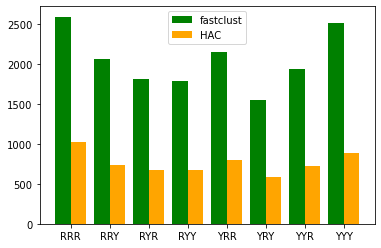

In [5]:
import matplotlib.pyplot as plt

tick = ["RRR", "RRY", "RYR", "RYY", "YRR", "YRY", "YYR", "YYY"]

plt.bar([1, 2, 3, 4, 5, 6, 7, 8], first_clust.values(), 0.4, label="fastclust", color='green')
plt.bar([1.4, 2.4, 3.4, 4.4, 5.4, 6.4, 7.4, 8.4], sec_clust.values(), 0.4, label="HAC", color='orange')

plt.xticks([1.2, 2.2, 3.2, 4.2, 5.2, 6.2, 7.2, 8.2], tick)

plt.legend()

plt.show()

In [7]:
from scipy.stats import ttest_rel

print(ttest_rel(list(first_clust.values()), list(sec_clust.values())))

Ttest_relResult(statistic=15.899436337157697, pvalue=9.44468577792314e-07)


A student test is made to compare the two number of clusters, we conclude that the HAC method is making less clusters as the pvalue is below 0.001.

A deeper comparison will require the user to create the clusters using both methods.The first clustering folder is created with the `data_protnaff.ipynb` notebook. We will create the second one here (**pay attention, it will take several hours !**)

In [ ]:
!mv $PROTNAFF/data_paper/trilib $PROTNAFF/data_paper/trilib_fast
!cd $PROTNAFF/data_paper && bash $PROTNAFF/create_frag_library.sh -a rna
!mv $PROTNAFF/data_paper/trilib $PROTNAFF/data_paper/trilib_hac
!mv $PROTNAFF/data_paper/trilib_fast $PROTNAFF/data_paper/trilib